# Proyecto final de la asignatura Minería de datos y el paradigma Big Data - curso 2022/23

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pyspark.sql import SparkSession
""" from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score """


' from sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay\nfrom sklearn.model_selection import cross_val_score '

## Rutas

In [4]:
path = './Data/'
file = 'itineraries_clean.csv'

## Limpieza del dataset

In [26]:
finalFile = 'itineraries_clean.csv'

columnsSelected = [ 'legId', 'searchDate', 'flightDate', 'startingAirport',
    'destinationAirport', 'travelDuration',
    'isBasicEconomy', 'totalFare',
    'seatsRemaining', 'totalTravelDistance', 
    'segmentsAirlineName', 'segmentsAirlineCode']

data = pd.read_csv(path + file,usecols=columnsSelected,index_col= None)
print(data)
data.to_csv(path + finalFile,index=False)

                                   legId  searchDate  flightDate  \
0       9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17   
1       98685953630e772a098941b71906592b  2022-04-16  2022-04-17   
2       98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17   
3       969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17   
4       980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17   
...                                  ...         ...         ...   
299995  90591f3aeeba1c88e66c64746299b28c  2022-04-17  2022-05-11   
299996  bc251918565f2c1aff1ea039220cfece  2022-04-17  2022-05-11   
299997  b6d15042b341b0845241af77866b97d0  2022-04-17  2022-05-11   
299998  55efe31162876477d2761abd5abb438d  2022-04-17  2022-05-11   
299999  e22ff727fea0f61ba78212ecc49b1992  2022-04-17  2022-05-11   

       startingAirport destinationAirport travelDuration  isBasicEconomy  \
0                  ATL                BOS        PT2H29M           False   
1                  ATL         

## Lectura del dataset

In [6]:
split = lambda x: x.split("||")

columnsSelected = [ 
    'legId', 
    #'searchDate',
    #'flightDate', 
    'startingAirport',
    'destinationAirport', 
    'travelDuration',
    #'isBasicEconomy', 
    'totalFare',
    'seatsRemaining', 'totalTravelDistance', 
    #'segmentsAirlineName', 'segmentsAirlineCode'
    ]

data = pd.read_csv(path + file,decimal='.',usecols=columnsSelected,)# parse_dates=['searchDate','flightDate'],)# converters={'segmentsAirlineName':split, 'segmentsAirlineCode':split})
data[:10]

,legId,startingAirport,destinationAirport,travelDuration,totalFare,seatsRemaining,totalTravelDistance
0,9ca0e81111c683bec1012473feefd28f,ATL,BOS,PT2H29M,248.6,9,947.0
1,98685953630e772a098941b71906592b,ATL,BOS,PT2H30M,248.6,4,947.0
2,98d90cbc32bfbb05c2fc32897c7c1087,ATL,BOS,PT2H30M,248.6,9,947.0
3,969a269d38eae583f455486fa90877b4,ATL,BOS,PT2H32M,248.6,8,947.0
4,980370cf27c89b40d2833a1d5afc9751,ATL,BOS,PT2H34M,248.6,9,947.0
5,79eda9f841e226a1e2121d74211e595c,ATL,BOS,PT2H38M,248.6,7,947.0
6,9335fae376c38bb61263281779f469ec,ATL,BOS,PT4H12M,251.1,3,956.0
7,3904bf87f2d1daf334f1ae7e3b876028,ATL,BOS,PT5H18M,251.1,3,956.0
8,d93988734c44a3c075d9efe373352507,ATL,BOS,PT5H32M,251.1,7,956.0
9,562e7d5dd6ecbf1509c0c19711dbdca9,ATL,BOS,PT6H38M,251.1,7,956.0


## Número de vuelos filtrados por la fecha de vuelo y destino

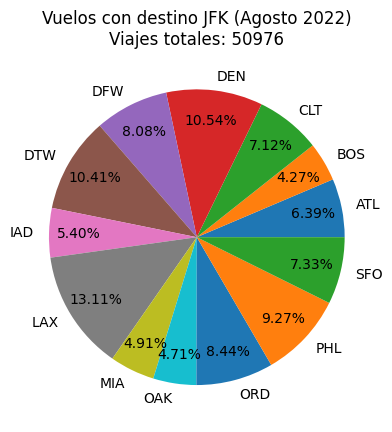

In [6]:
# df[['legId', 'startingAirport', 'destinationAirport', 'flightDate']]

# Me quedo con los vuelos únicos, evito repeticiones del mismo vuelo
df = data.drop_duplicates(subset=['legId'])

start_date = pd.Timestamp('2022-08-01')  # Fecha de inicio
end_date = pd.Timestamp('2022-08-31')  # Fecha de fin

# Me quedo con los vuelos dentro del rango de fechas y que se dirijan a un destino especifico
df = df.loc[((df['flightDate'] >= start_date) & (df['flightDate'] <= end_date)) & (df['destinationAirport'] == 'JFK')] 

df = df[['startingAirport', 'destinationAirport']]
df = df.groupby(['startingAirport', 'destinationAirport']).size().reset_index(name='Count')

viajesTotales = df['Count'].sum()

# Genero el gráfico circular
plt.pie(df['Count'], labels=df['startingAirport'], autopct='%0.2f%%', pctdistance=0.8)
plt.title(f'Vuelos con destino JFK (Agosto 2022)\nViajes totales: {viajesTotales}')
plt.show()

#plt.savefig('vuelosJFK.png', bbox_inches='tight')

## Número de búsquedas de vuelo por mes

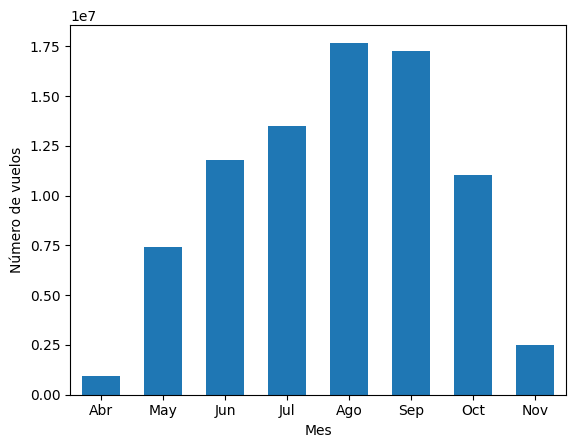

In [7]:
# Sacar el mes del vuelo
data['month'] = data['flightDate'].dt.month

# Consigo una serie que contiene el mes y el número de vuelos
flight_count = data['month'].value_counts().sort_index()

# Creo un gráfico de barras
fig, ax = plt.subplots()
ax.bar(flight_count.index, flight_count.values, align='center', width=0.6)

# Ajustes del gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Número de vuelos')
ax.set_xticks(range(4, 12))
ax.set_xticklabels(['Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov'], ha='center')
ax.set_xlim(3.5, 11.5)

plt.show()

# plt.savefig('busquedasXMes.png')

## Media de coste de vuelos por mes

In [6]:
abril = data[data['flightDate'].dt.month == 4]['totalFare'].median()
mayo = data[data['flightDate'].dt.month == 5]['totalFare'].median()
junio = data[data['flightDate'].dt.month == 6]['totalFare'].median()
julio = data[data['flightDate'].dt.month == 7]['totalFare'].median()
agosto = data[data['flightDate'].dt.month == 8]['totalFare'].median()
septiembre = data[data['flightDate'].dt.month == 9]['totalFare'].median()
octubre  = data[data['flightDate'].dt.month == 10]['totalFare'].median()
noviembre = data[data['flightDate'].dt.month == 11]['totalFare'].median()

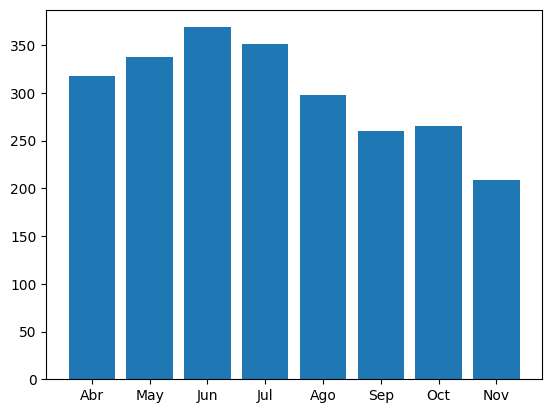

<Figure size 640x480 with 0 Axes>

In [7]:
meses = ['Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov']
MediaPrecioMes = np.array([
    abril,
    mayo,
    junio,
    julio,
    agosto,
    septiembre,
    octubre,
    noviembre
])

fig, ax = plt.subplots()
ax.bar(meses, MediaPrecioMes)

plt.show()
plt.savefig('MediaPrecioXMes.png')

## Número de vuelos por aeropuerto de destino (Abril - Noviembre)

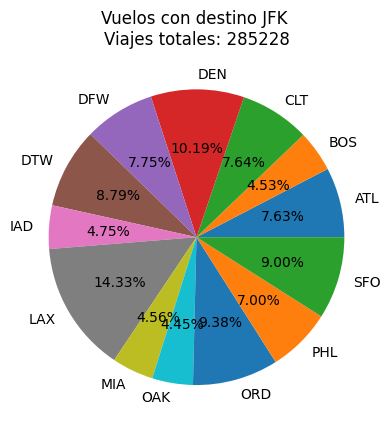

In [9]:
# Me quedo con los vuelos únicos, evito repeticiones del mismo vuelo
df = data.drop_duplicates(subset=['legId'])

#Me quedo con los vuelos que se dirijan a un destino especifico
df = df.loc[(df['destinationAirport'] == 'JFK')]

df = df.groupby(['startingAirport', 'destinationAirport']).size().reset_index(name='Count')

viajesTotales = df['Count'].sum()

# Genero gráfico circular
plt.pie(df['Count'], labels=df['startingAirport'], autopct='%0.2f%%')
plt.title(f'Vuelos con destino JFK \nViajes totales: {viajesTotales}')
plt.show()

# plt.savefig('vuelosJFK(anyoEntero).png', bbox_inches='tight')

## Número de vuelos según el tipo de tarifa y origen

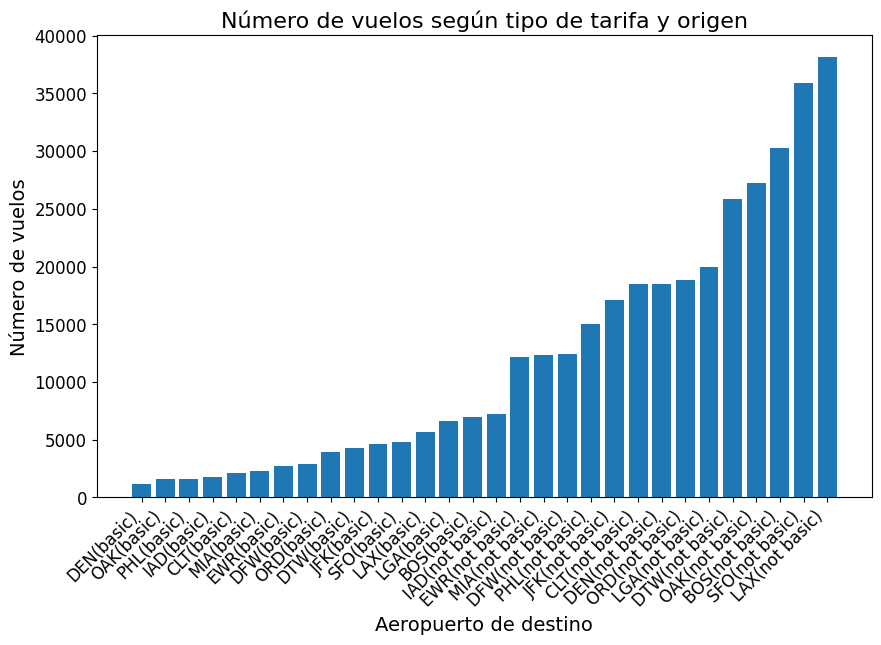

In [9]:
# Me quedo con los vuelos únicos, evito repeticiones del mismo vuelo
df = data.drop_duplicates(subset=['legId'])

# Me quedo con los vuelos con origen ATL
df = df.loc[(df['startingAirport'] == 'ATL')]
df = df.groupby(['startingAirport', 'destinationAirport', 'isBasicEconomy']).size().reset_index(name='Count')
df = df.sort_values(by='Count')

label = np.where(df['isBasicEconomy'], '(basic)', '(not basic)')

# Creo gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df['destinationAirport'] + label, df['Count'])

# Configuro el gráfico
ax.set_title('Número de vuelos según tipo de tarifa y origen', fontsize=16)
ax.set_xlabel('Aeropuerto de destino', fontsize=14)
ax.set_ylabel('Número de vuelos', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# plt.savefig('vuelosEconomiaBasica(ATL).png', dpi=300, bbox_inches='tight')

## Top 10 vuelos más buscados

<AxesSubplot:title={'center':'Top 10 vuelos más repetidos'}, ylabel='(Origen,Destino)'>

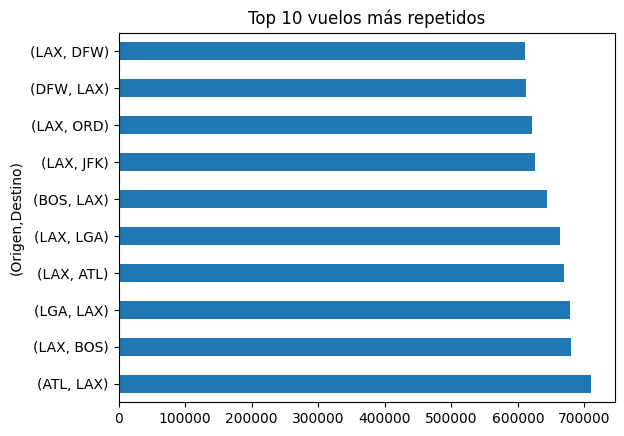

In [8]:
value = data.pivot_table(columns=['startingAirport','destinationAirport'], aggfunc= 'size')
value = value.sort_values(ascending=False)
value[:10].plot(kind = 'barh',title = 'Top 10 vuelos más repetidos',xlabel = '(Origen,Destino)')

## Los 10 días más concurridos 

In [ ]:
df = data.drop_duplicates(subset=['legId'])
value = df.pivot_table(columns=['startingAirport','flightDate'], aggfunc= 'size')
value = value.sort_values(ascending=False)
value[:10].plot(kind = 'barh',title = 'Top 10 días más concurridos')

## Datos interesantes
- vuelo más caro
- vuelo más barato
- vuelo más largo en distancia
- vuelo comprado con mayor antelación

### Vuelo más caro

In [69]:
vuelo = data.loc[data['totalFare'].idxmax()]
print(f"El vuelo más caro es desde {vuelo['startingAirport']} hasta {vuelo['destinationAirport']}, costando: {vuelo['totalFare']}")

El vuelo más caro es desde SFO hasta DTW, costando: 8260.61


### Vuelo más barato

In [70]:
vuelo = data.loc[data['totalFare'].idxmin()]
print(f"El vuelo más barato es desde {vuelo['startingAirport']} hasta {vuelo['destinationAirport']}, costando: {vuelo['totalFare']}")

El vuelo más barato es desde LAX hasta OAK, costando: 19.59


### Vuelo más largo en distancia

In [ ]:
vuelo = data.loc[data['totalTravelDistance'].idxmax()]
print(f"El vuelo más largo es desde {vuelo['startingAirport']} hasta {vuelo['destinationAirport']}, con una distancia de {vuelo['totalTravelDistance']}")


### Vuelo comprado con mayor antelación

In [65]:
data['diferent'] = data['flightDate'] - data['searchDate']
print(f"El vuelo comprado con mayor antelación fue de {data['diferent'].max().days} dias antes")

El vuelo comprado con mayor antelación fue de 60 dias antes


## Métodos de clasificación

In [ ]:
# Cargo los datos en el dataframe y reduzco las columnas para simplificar el cálculo
df = pd.read_csv('itineraries_clean.csv')
df = df[['legId', 'startingAirport', 'destinationAirport', 'flightDate', 'isBasicEconomy']]

# Me quedo con los vuelos únicos, evito repeticiones del mismo vuelo y convierto las fechas en objetos timestamp para facilitar el tratamiento
df = df.drop_duplicates(subset=['legId'])
df['flightDate'] = pd.to_datetime(df['flightDate']).apply(lambda x: x.timestamp())

# Descarto la columna "legId" para simplificar más aún el cálculo
df = df[['startingAirport', 'destinationAirport', 'flightDate', 'isBasicEconomy']]

# Definir diccionario de reemplazo para que los métodos de clasificación puedan procesar los datos
aeropuertos = {'ATL': 1, 'BOS': 2, 'CLT': 3, 'DEN': 4, 'DFW': 5, 'DTW': 6, 'EWR': 7, 'IAD': 8, 'JFK': 9, 'LAX': 10, 'LGA': 11, 'MIA': 12, 'OAK': 13, 'ORD': 14, 'PHL': 15, 'SFO': 16}

# Reemplazar los valores en las columnas correspondientes
df['startingAirport'] = df['startingAirport'].replace(aeropuertos)
df['destinationAirport'] = df['destinationAirport'].replace(aeropuertos)

# Separar datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('isBasicEconomy', axis=1), df['isBasicEconomy'], test_size=0.2, random_state = 42)

### Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

# Evaluar calidad del modelo Gaussian Naive Bayes
gnb_confusion = confusion_matrix(y_test, gnb_pred)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
gnb_auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:,1])
gnb_cv_score = cross_val_score(gnb, df.drop('isBasicEconomy', axis=1), df['isBasicEconomy'], cv=5)

# Matriz de confusión
print("GaussianNB matrix:")
disp = ConfusionMatrixDisplay(gnb_confusion)
disp.plot()
plt.show()
print("\n")

# Dibujar la curva ROC para Gaussian Naive Bayes
plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(gnb_auc))

# Agregar etiquetas y leyenda al gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Cross validation score
print("Cross Validation Scores:", gnb_cv_score)

#Calculo y muestro la precisión del modelo
gnb_acc = accuracy_score(y_test, gnb_pred)
print("GaussianNB accuracy: ", gnb_acc)

### Decision Tree

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Evaluar calidad del modelo Decision Tree
dt_confusion = confusion_matrix(y_test, dt_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
dt_cv_score = cross_val_score(dt, df.drop('isBasicEconomy', axis=1), df['isBasicEconomy'], cv=5)

# Matriz de confusión
print("Decision Tree matrix:")
disp = ConfusionMatrixDisplay(dt_confusion)
disp.plot()
plt.show()
print("\n")

# Dibujar la curva ROC para Gaussian Naive Bayes
plt.plot(dt_fpr, dt_tpr, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(dt_auc))

# Agregar etiquetas y leyenda al gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Cross validation score
print("Cross Validation Scores:", dt_cv_score)

# Calculo y muestro la precisión del modelo
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision accuracy: ", dt_acc)

### Random Forest

In [ ]:
# Random Forest (Tarda demasiado)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluar calidad del modelo Random Forest
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
rf_cv_score = cross_val_score(rf, df.drop('isBasicEconomy', axis=1), df['isBasicEconomy'], cv=5)

print("Random Forest matrix:")
disp = ConfusionMatrixDisplay(rf_confusion)
disp.plot()
plt.show()
print("\n")

# Dibujar la curva ROC para Gaussian Naive Bayes
plt.plot(rf_fpr, rf_tpr, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(rf_auc))

# Agregar etiquetas y leyenda al gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
plt.show()

# Cross validation score
print("Cross Validation Scores:", rf_cv_score)

#Calculo y muestro la precisión del modelo
rf_acc = accuracy_score(y_test, rf_pred)
print("Random accuracy: ", rf_acc)